In [13]:
import numpy as np
import anndata as ad
import scanpy as sc
from src import constants
from sklearn.decomposition import PCA


In [19]:
tasic = ad.read_h5ad("../results/anndata/tasic_integrated_rpca.h5ad")
tasic

AnnData object with n_obs × n_vars = 6125 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id', 'sample_type', 'organism', 'donor', 'sex', 'age_days', 'eye_condition', 'genotype', 'driver_lines', 'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion', 'injection_label_direction', 'injection_primary', 'injection_secondary', 'injection_tract', 'injection_material', 'injection_exclusion_criterion', 'facs_date', 'facs_container', 'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set', 'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch', 'total_reads', 'percent_exon_reads', 'percent_intron_reads', 'percent_intergenic_reads', 'percent_rrna_reads', 'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads', 'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg', 'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion', 'tdt_cpm', 'gfp_cpm', 'Class', 'Subclass', 'Subtype', 'confusion_score', 'cluster_c

In [23]:
tasic.X.todense()

matrix([[3.587278  , 0.        , 0.00874445, ..., 0.        , 0.1276307 ,
         0.        ],
        [0.        , 0.        , 5.0040097 , ..., 0.        , 0.43241614,
         0.        ],
        [0.        , 0.        , 5.1446776 , ..., 0.        , 0.        ,
         0.01284549],
        ...,
        [0.        , 3.5906253 , 0.41049358, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 2.2282207 , 3.864542  , ..., 0.        , 0.83512026,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.2071708 ,
         0.        ]], dtype=float32)

In [4]:
def do_pca(adata):
    sc.pp.normalize_total(adata, target_sum = constants.NORMALIZE_TARGET_SUM)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes = constants.NUM_HVG_GENES)
    sc.pp.pca(adata, n_comps = constants.NUM_PCS)
    return adata

In [8]:
tasic = do_pca(tasic)

/home/joram/mambaforge/envs/snakemake/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:269: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(


In [12]:
tasic.X

<6125x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 4333124 stored elements in Compressed Sparse Row format>

/home/joram/mambaforge/envs/snakemake/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


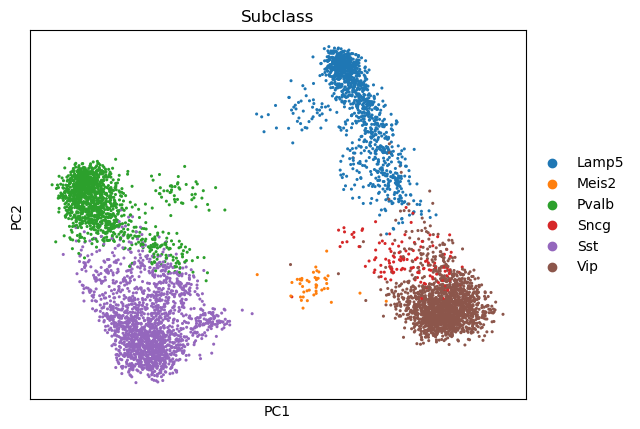

In [11]:
sc.pl.pca(tasic, color = 'Subclass')